In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_theme(style = 'whitegrid')
import matplotlib.pyplot as plt

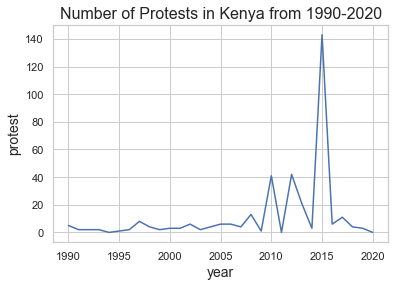

In [2]:
df = pd.read_csv('main_data.csv')
df_kenya = df[df['country'] == 'Kenya']
df_kenya_yrs = df_kenya.groupby('year').sum()
# Plot of number of protests over the years for Kenya
kenya_line_plt = sns.lineplot(x = 'year', y = 'protest', data = df_kenya_yrs)
plt.title('Number of Protests in Kenya from 1990-2020', size = 16)
plt.ylabel('protest', size = 14)
plt.xlabel('year', size = 14)
None

In [3]:
df_kenya_rzns = df_kenya[['year', 'reasons_social', 'reasons_policebrutality', 'reasons_land',
                          'reasons_political', 'reasons_labor', 'reasons_price', 'reasons_removal']]
df_kenya_2015 = df_kenya_rzns[df_kenya_rzns['year'] == 2015]
# Creating list for iterable and names for new df
reasons = ['reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal', 'reasons_political',
           'reasons_price', 'reasons_policebrutality']
# Initializing empty df
df_temp = pd.DataFrame()
for reason in reasons:
    df_temp[reason] = [sum(df_kenya_2015[reason])]
df_reasons = df_temp.T
df_reasons.rename(index = {'reasons_social':'social reforms',
                              'reasons_policebrutality':'police brutality',
                              'reasons_land':'property',
                              'reasons_political':'law & politics',
                              'reasons_labor':'labor rights',
                              'reasons_price':'inflation',
                              'reasons_removal':'anti-authoritarian'},
                  columns = {0:'Total Protests'},
                  inplace = True)

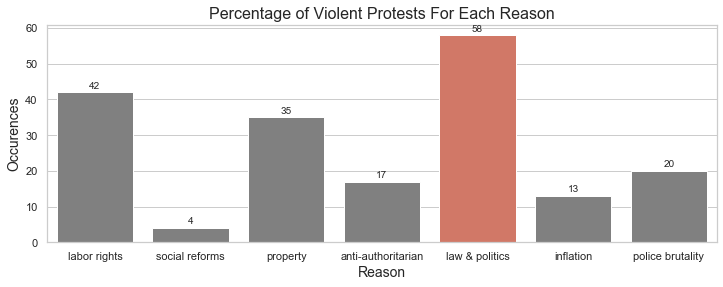

In [4]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize = fig_dims)

# Plotting
values = df_reasons['Total Protests']
clrs = ['gray' if (x < max(values)) else '#e36c55' for x in values]

violence_plot = sns.barplot(x = df_reasons.index, y = 'Total Protests', data = df_reasons, ax = ax, palette = clrs)

for p in violence_plot.patches:
    height = int(p.get_height())
    ax.annotate('{}'.format(height), xy = (p.get_x() + p.get_width() / 2, height), xytext = (0, 2), 
                textcoords = 'offset points', ha = 'center', va = 'bottom')
                           
plt.xlabel('Reason', size = 14)
plt.ylabel('Occurences', size = 14)
plt.title('Percentage of Violent Protests For Each Reason', size = 16)

None